# 📊 Análise Estatística da Lotofácil

Este projeto tem como objetivo analisar os sorteios da Lotofácil sob a ótica da
estatística descritiva e inferencial, avaliando se os resultados apresentam
padrões estatisticamente relevantes ou se são compatíveis com um processo
aleatório.

A análise utiliza dados históricos públicos e ferramentas amplamente usadas
na área de Ciência e Análise de Dados.


## 🛠️ Bibliotecas Utilizadas

As bibliotecas abaixo foram utilizadas por serem amplamente adotadas na análise
de dados e estatística aplicada:

- **pandas**: manipulação e organização de dados tabulares
- **numpy**: operações matemáticas e vetorizadas
- **scipy.stats**: testes estatísticos, incluindo o teste Qui-quadrado
- **matplotlib**: visualização de dados

Essas ferramentas são padrão em projetos de análise exploratória e estatística
aplicada, conforme práticas consolidadas na comunidade científica e técnica.


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

## 📂 Fonte dos Dados

Os dados utilizados neste projeto foram obtidos a partir do site
**asloterias.com.br**, que disponibiliza históricos completos e atualizados
dos concursos da Lotofácil.

### Características do conjunto de dados:
- Período: do primeiro concurso até o concurso mais recente disponível
- Total de números sorteados por concurso: 15
- Intervalo numérico: 1 a 25
- Formato original: CSV (separado por ponto e vírgula)

Este tipo de dado é adequado para análises estatísticas descritivas e testes
de aderência, como o teste Qui-quadrado.


In [18]:
caminho = "/content/loto_facil_asloterias_ate_concurso_3570_sorteio.csv"
# Dimensão do dataset
df.shape
# Informações gerais sobre o dataset
df.info()
# Estatísticas descritivas básicas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Concurso  3570 non-null   int64 
 1   Data      3570 non-null   object
 2   bola 1    3570 non-null   int64 
 3   bola 2    3570 non-null   int64 
 4   bola 3    3570 non-null   int64 
 5   bola 4    3570 non-null   int64 
 6   bola 5    3570 non-null   int64 
 7   bola 6    3570 non-null   int64 
 8   bola 7    3570 non-null   int64 
 9   bola 8    3570 non-null   int64 
 10  bola 9    3570 non-null   int64 
 11  bola 10   3570 non-null   int64 
 12  bola 11   3570 non-null   int64 
 13  bola 12   3570 non-null   int64 
 14  bola 13   3570 non-null   int64 
 15  bola 14   3570 non-null   int64 
 16  bola 15   3570 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 474.3+ KB


,Concurso,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15
count,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000
mean,1785.500000,13.026050,12.996919,13.078151,12.993557,12.796639,13.189076,13.005882,12.919048,13.024650,12.856022,13.172269,13.035574,12.982633,12.949860,13.166947
std,1030.714558,7.220588,7.264120,7.118089,7.266933,7.209827,7.245319,7.239661,7.185872,7.170185,7.322495,7.190968,7.266540,7.242989,7.140232,7.244528
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,893.250000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,1785.500000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
75%,2677.750000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000
max,3570.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


## Leitura definitiva do conjunto de dados

Nesta etapa, o arquivo CSV é carregado ignorando as linhas iniciais de
metadados e textos informativos presentes no arquivo original.  
A leitura começa diretamente na linha que contém o cabeçalho real dos dados,
garantindo que cada coluna represente corretamente as informações do concurso
e os números sorteados.

Após a leitura, são realizadas verificações iniciais para confirmar:
- Estrutura correta do DataFrame
- Nomes das colunas
- Correspondência entre concursos e dezenas sorteadas


In [8]:
# CÉLULA 3 — LEITURA DEFINITIVA DO CSV (COM CABEÇALHO CORRETO)

df = pd.read_csv(
    caminho,
    sep=';',
    skiprows=6,
    engine='python'
)

print(df.head())
print(df.columns)


   Concurso        Data  bola 1  bola 2  bola 3  bola 4  bola 5  bola 6  \
0      3570  23/12/2025      19      18       3      13       6      10   
1      3569  22/12/2025       2       1      15      14       3      10   
2      3568  20/12/2025      10       8       6      24      18      20   
3      3567  19/12/2025       1       2      18      25       4       9   
4      3566  18/12/2025      12      24       4      20      17      22   

   bola 7  bola 8  bola 9  bola 10  bola 11  bola 12  bola 13  bola 14  \
0      21       1      11        5       24       20        2       15   
1      17       8      19       20       18        5        4        6   
2      19      13      22        1       11        2        5        4   
3      20       8      19       12       14       10       24       15   
4       2       1      13       15       14        7       21        8   

   bola 15  
0       22  
1       24  
2        7  
3       11  
4       23  
Index(['Concurso', 'Data',

## Extração das dezenas sorteadas

Nesta etapa, todas as colunas correspondentes às dezenas sorteadas em cada
concurso são unificadas em uma única estrutura. O objetivo é concentrar todas
as ocorrências dos números em uma única série, facilitando a análise de
frequência e a aplicação de métodos estatísticos.

Cada valor extraído representa uma ocorrência individual de uma dezena
sorteada ao longo do histórico de concursos.


In [9]:
# CÉLULA 4 — EXTRAÇÃO DAS DEZENAS

colunas_bolas = [f'bola {i}' for i in range(1, 16)]

dezenas = pd.concat([df[col] for col in colunas_bolas])

print(dezenas.head(20))
print("Total de dezenas:", len(dezenas))


0     19
1      2
2     10
3      1
4     12
5     10
6      7
7      1
8     11
9     25
10    17
11     6
12    13
13    22
14    10
15     8
16    16
17     7
18    17
19     7
dtype: int64
Total de dezenas: 53550


## Cálculo da frequência dos números sorteados

Com todas as dezenas reunidas em uma única estrutura, foi realizada a contagem
da frequência absoluta de cada número no intervalo de 1 a 25. Essa etapa
permite observar quantas vezes cada dezena foi sorteada ao longo de todo o
histórico analisado.

A reindexação garante que todos os números do espaço amostral estejam
representados, mesmo que algum valor apresentasse frequência nula, assegurando
consistência para análises estatísticas posteriores.


In [10]:
# CÉLULA 5 — FREQUÊNCIA DOS NÚMEROS (1 a 25)

frequencias = dezenas.value_counts().sort_index()

# garante que todos os números de 1 a 25 apareçam
frequencias = frequencias.reindex(range(1, 26), fill_value=0)

frequencias


,count
1,2161
2,2136
3,2155
4,2154
5,2141
6,2093
7,2109
8,2068
9,2130
10,2216


## Visualização da frequência dos números

Nesta etapa, é apresentada a distribuição gráfica das frequências absolutas
dos números sorteados na Lotofácil. O gráfico de barras permite uma inspeção
visual rápida de possíveis variações entre as dezenas ao longo do histórico
analisado.

A visualização auxilia na identificação de desvios aparentes em relação à
distribuição uniforme esperada, servindo como apoio à análise estatística
formal realizada posteriormente.


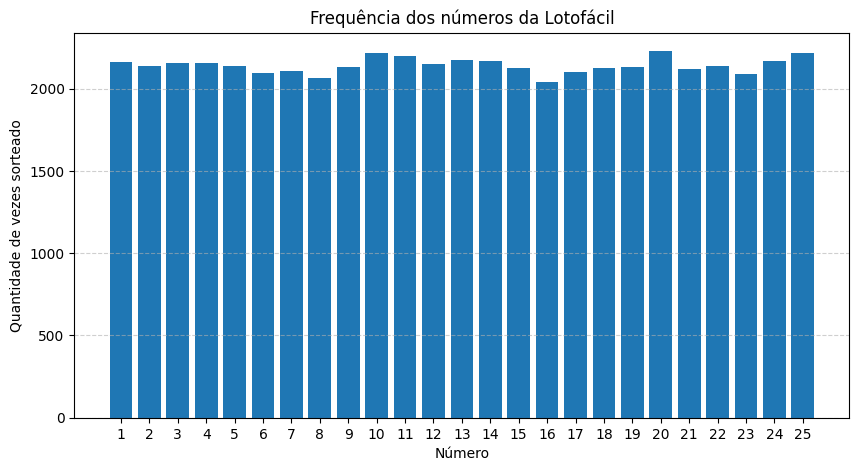

In [19]:
# CÉLULA 6 — GRÁFICO DE FREQUÊNCIA

plt.figure(figsize=(10, 5))
plt.bar(frequencias.index, frequencias.values)

plt.xlabel("Número")
plt.ylabel("Quantidade de vezes sorteado")
plt.title("Frequência dos números da Lotofácil")

plt.xticks(range(1, 26))

# Linhas de grade tracejadas
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.6
)

plt.show()


## Teste de aderência Qui-quadrado

Nesta etapa, foi aplicado o teste Qui-quadrado de aderência para avaliar se a
distribuição observada das dezenas sorteadas difere de uma distribuição
uniforme teórica. A frequência esperada foi definida assumindo que todos os
números entre 1 e 25 possuem a mesma probabilidade de ocorrência.

O teste compara as frequências observadas com as frequências esperadas,
retornando a estatística Qui-quadrado e o p-valor, que servem de base para a
avaliação estatística da hipótese de uniformidade.


In [12]:
# CÉLULA 7 — TESTE QUI-QUADRADO

total_dezenas = len(dezenas)

# frequência esperada para cada número (distribuição uniforme)
esperado = np.full(25, total_dezenas / 25)

chi2, p_valor = chisquare(
    f_obs=frequencias.values,
    f_exp=esperado
)

print(f"Estatística Qui-quadrado: {chi2:.2f}")
print(f"p-valor: {p_valor:.4f}")


Estatística Qui-quadrado: 23.03
p-valor: 0.5183


## Conclusão

Neste projeto, foi realizada uma análise estatística exploratória do histórico
de sorteios da Lotofácil, utilizando dados públicos e um fluxo estruturado de
tratamento, transformação e visualização dos dados.

Após a consolidação das dezenas sorteadas e o cálculo das frequências
observadas, aplicou-se o teste de aderência Qui-quadrado com o objetivo de
avaliar a compatibilidade dos dados com uma distribuição uniforme teórica.

O valor da estatística Qui-quadrado obtido, juntamente com um p-valor elevado,
indica que os desvios observados entre as frequências dos números podem ser
atribuídos ao acaso, não havendo evidência estatística suficiente para rejeitar
a hipótese nula de uniformidade.

Dessa forma, com base nos dados analisados e no teste estatístico aplicado, não
foram identificados padrões estatisticamente significativos que indiquem
vantagens preditivas na escolha de determinadas dezenas. Os resultados estão
em conformidade com o comportamento esperado de um processo aleatório.
